In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score

plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["font.size"] =14

read in and seperate the data

In [98]:
data = pd.read_csv("Emails.csv")
data = data.replace("", np.nan, regex=True)

# Filter rows where the "spam" column is "1"
Phish = data[data["spam"] == 1]

# Print the filtered DataFrame
print(Phish)

                                                   text  spam
0     Subject: naturally irresistible your corporate...     1
1     Subject: the stock trading gunslinger  fanny i...     1
2     Subject: unbelievable new homes made easy  im ...     1
3     Subject: 4 color printing special  request add...     1
4     Subject: do not have money , get software cds ...     1
...                                                 ...   ...
1363  Subject: are you ready to get it ?  hello !  v...     1
1364  Subject: would you like a $ 250 gas card ?  do...     1
1365  Subject: immediate reply needed  dear sir ,  i...     1
1366  Subject: wanna see me get fisted ?  fist  bang...     1
1367  Subject: hot stock info : drgv announces anoth...     1

[1368 rows x 2 columns]


data is seperated so that all the data is now in the right format and all of the non spam is out of the dataset

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
# Tokenize and preprocess the text
text_data = data["text"]  # Replace with the actual column name containing email text
labels = data["spam"]  # Replace with the actual column name containing email categories

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(text_data, labels, test_size=0.2, random_state=42)

In [100]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Choose a classification algorithm
classifier = MultinomialNB()

# Train the classifier
classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       856
           1       1.00      0.41      0.59       290

    accuracy                           0.85      1146
   macro avg       0.92      0.71      0.75      1146
weighted avg       0.88      0.85      0.83      1146



In [101]:
keywords_category1 = ["meds", "drug", "med", "drugs"]
keywords_category2 = ["living", "house", "home"]
keywords_category3 = ["grants", "00", "$"]
keywords_category4 = ["XXX", "hot", "sexy", "bang"]
keywords_category5 = ["wallet", "bitcoin", "crypto"]
keywords_category6 = ["advertisment", "request", "limited"]
data["category"] = ""

# Apply keyword searches to assign labels
for index, row in data.iterrows():
    email_text = row["text"]  # Replace with your text column name

    if any(keyword in email_text for keyword in keywords_category1):
        data.at[index, "category"] = "Category1"
    if any(keyword in email_text for keyword in keywords_category2):
        data.at[index, "category"] = "Category2"
    if any(keyword in email_text for keyword in keywords_category3):
        data.at[index, "category"] = "Category3"
    if any(keyword in email_text for keyword in keywords_category4):
        data.at[index, "category"] = "Category4"
    if any(keyword in email_text for keyword in keywords_category5):
        data.at[index, "category"] = "Category5"
    if any(keyword in email_text for keyword in keywords_category6):
        data.at[index, "category"] = "Category6"
# Assign other categories in a similar way
data.to_csv("Labeled_Emails.csv", index=False)
data2 = pd.read_csv("Labeled_Emails.csv") 
filtered_data = data2[(data2["spam"] == 1) & (data2["category"].notna())]
fd = data2[data2["spam"] == 1]
print(fd)
print(filtered_data)

                                                   text  spam   category
0     Subject: naturally irresistible your corporate...     1  Category6
1     Subject: the stock trading gunslinger  fanny i...     1        NaN
2     Subject: unbelievable new homes made easy  im ...     1  Category6
3     Subject: 4 color printing special  request add...     1  Category6
4     Subject: do not have money , get software cds ...     1  Category1
...                                                 ...   ...        ...
1363  Subject: are you ready to get it ?  hello !  v...     1  Category1
1364  Subject: would you like a $ 250 gas card ?  do...     1  Category3
1365  Subject: immediate reply needed  dear sir ,  i...     1  Category3
1366  Subject: wanna see me get fisted ?  fist  bang...     1  Category6
1367  Subject: hot stock info : drgv announces anoth...     1  Category6

[1368 rows x 3 columns]
                                                   text  spam   category
0     Subject: naturally i

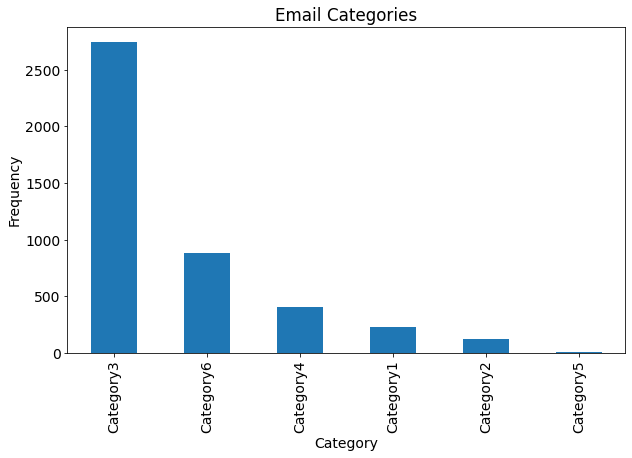

In [102]:
category_counts = data2["category"].value_counts()

# Create a bar graph
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title("Email Categories")
plt.xlabel("Category")
plt.ylabel("Frequency")

# Display the bar graph
plt.show()
